In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/dataset.csv')

In [3]:
fitur = ['elevation_m', 'curah_hujan_mm', 'jarak_sungai_m',
         'kemiringan_persen','banjir_historis']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[fitur])


In [4]:
# === 4. Jalankan K-Means ===
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['klaster'] = kmeans.fit_predict(data_scaled)


In [5]:
# === 5. Pemetaan label klaster ke zonasi ===
mapping = {0: 'Rendah', 1: 'Sedang', 2: 'Tinggi'}

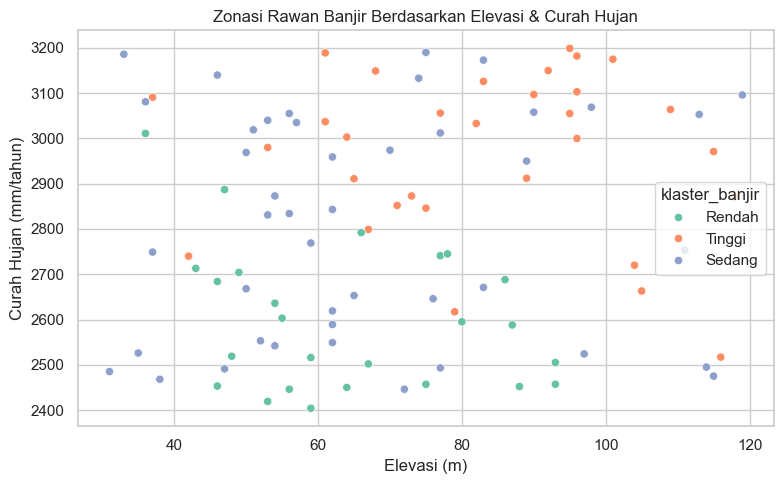

In [6]:
# Urutkan berdasarkan elevasi rata-rata per klaster (agar labelnya masuk akal)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=fitur)
order = centers['elevation_m'].argsort().values
label_map = {old: mapping[new] for new, old in enumerate(order)}
data['klaster_banjir'] = data['klaster'].map(label_map)

# === 6. Simpan hasilnya ke CSV ===
data.to_csv("hasil_klaster_banjir.csv", index=False)

# === 7. Visualisasi ===
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='elevation_m', y='curah_hujan_mm', hue='klaster_banjir', palette='Set2')
plt.title("Zonasi Rawan Banjir Berdasarkan Elevasi & Curah Hujan")
plt.xlabel("Elevasi (m)")
plt.ylabel("Curah Hujan (mm/tahun)")
plt.tight_layout()
plt.show()

In [7]:
claster = pd.read_csv('hasil_klaster_banjir.csv')
print(claster)

     id  latitude   longitude  elevation_m  curah_hujan_mm  jarak_sungai_m  \
0     1 -0.842509  123.041257           53            2419              32   
1     2 -0.830986  123.065456          104            2720             259   
2     3 -0.835360  123.052574          101            3175              19   
3     4 -0.838027  123.060343           65            2911             255   
4     5 -0.846880  123.076303           67            2799             109   
..  ...       ...         ...          ...             ...             ...   
95   96 -0.840124  123.053968           89            2950             131   
96   97 -0.839545  123.069038           36            3011             142   
97   98 -0.841449  123.075884           86            2688             172   
98   99 -0.849492  123.075483           65            2653             224   
99  100 -0.847842  123.071195           74            3133             230   

    kemiringan_persen     landuse  banjir_historis  klaster kla